### Manual Neural Networks:

In this section, we'll be creating some of the basic functions and operations of Tensorflow (Python library for Neural Networks). The purpose of this, is to get aware of the foundation of Neural Networks, and how they work. Later on, when we'll be using Tensorflow, we'll be actually understanding what's going on at the backend of those classes and function, we repeatedly use.

Following are the things we'll be coding out in Python:

#### Operation Class:

* Input nodes
* Output nodes
* Global default graph variable
* Compute method (going to be overwritten by extended class)


Alright, so without furter delay, LET'S JUMP INTO IT.

### Basic Operations:

In [1]:
class Operation():
    
    def __init__(self, input_nodes = []):
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
            
        
    def compute(self):
        pass

In [2]:
class add(Operation): # for addition of two numbers
    
    def __init__(self, x, y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        
        return x_var + y_var

In [3]:
class multiply(Operation): # for multiplication of two numbers
    
    def __init__(self, x, y):
        super().__init__([x,y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        
        return x_var * y_var

In [4]:
class matmul(Operation): # for matrix multiplication
    
    def __init__(self, x, y):
        super().__init__([x, y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        
        return x_var.dot(y_var)

### Placeholders:

Placeholders are the __empty__ nodes, that need a value to be provided to compute the output. 

In [5]:
class Placeholder():
    
    def __init__(self):
        
        self.output_nodes = [] # initialize with an empty list
        _default_graph.placeholders.append(self) # append this to _default_graph object, we'll create later on!
        

### Variables:

Changeble parameters of Graph

In [6]:
class Variable():
    
    def __init__(self, initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)
        

### Graphs:

Global parameters connecting __variables__ and __placeholders__ to operations

In [7]:
class Graph(): # This is going to be connecting the 'placeholders' and 'variables' to the operations they belong to

    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        
        global _default_graph # going to allow us to acces this inside other classes, als keeps track of all the obove paramerters i.e operations/placeholders/variables
        _default_graph = self
        

In [8]:
# Now let's go ahead see these classes we created in action

g = Graph()

g.set_as_default()

A = Variable(10)

b = Variable(1)

x = Placeholder()

y = multiply(A,x)

z = add(y,b)

We just went ahead and initiated every single class that is supposed to perform corresponding operations But now we need to create a session class, that's going to execute this Graph class.

Now that the Graph has all the nodes, we need to execute all the operations, within a session.

For this we'll use __PostOder Tree__ traversal to make sure we execute the nodes in correct order. __Very Important!__

So, let's go ahead and create a Function for that!

In [9]:
def traverse_postorder(operation):
    """
    PostOrder Transversal of Nodes. Basically makes sure that the computations are done in correct order
    (Ax first, then Ax + b)
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
                
        nodes_postorder.append(node)
        
    recurse(operation)
    
    return nodes_postorder

In [10]:
# Session Class
import numpy as np

class Session():
    
    def run(self, operation, feed_dict = {}):
        """
        operations -> actual operations, feed_dict -> maps placeholders to conduct operations
        feed_dict{} -> later on we'll feeding data to our neural network, using this feed_dict{}
        
        """
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node) == Placeholder: # if node type is Placeholder, pass in as a key for feed_dict{}
                
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                
                node.output = node.value
                
            else:
                # OPERATION
                node.inputs = [input_node.output for input_node in node.input_nodes]
                
                node.output = node.compute(*node.inputs) # since we don't know how many arguments we're gonna
                # pass in, so we're using *(args) here. because the size of the list could be unknown!

            if type(node.output) == list:
                node.output = np.array(node.output)
                
        return operation.output

In [11]:
sess = Session()

In [12]:
result = sess.run(operation = z, feed_dict = {x: 10})

In [13]:
result # reports back the reqeusted operation!

101

In [14]:
# Now let's show some matrix multiplications!

g = Graph()

g.set_as_default()

A = Variable([[10,20],[30,40]])

b = Variable([1,1])

x = Placeholder()

y = matmul(A,b)

z = add(y,b)

In [15]:
sess = Session()

In [16]:
result = sess.run(operation = z, feed_dict = {x: 10})

In [17]:
result 

array([31, 71])

## Classification:

### Activation Functions:

In [18]:
import matplotlib.pyplot as plt

%matpotlib inline

UsageError: Line magic function `%matpotlib` not found.


In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

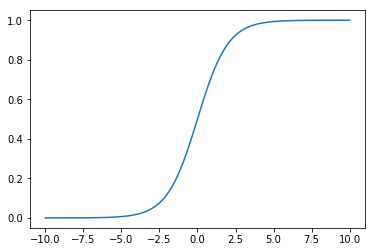

In [21]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

plt.plot(sample_z, sample_a)

# Remember! The range of Sigmoid function is always between 0-1

In [80]:
# Now let's try to embed it into a Operations class

class Sigmoid(Operation):
    
    def __init__(self,z):
        
        super().__init__([z])
        
    def compute(self, z_val):
        return 1 / (1 + np.exp(-z_val))
    

In [23]:
from sklearn.datasets import make_blobs # to create a random dataset with labels

In [28]:
data = make_blobs(n_samples = 50, n_features = 2, centers = 2, random_state = 75)

In [29]:
type(data)

tuple

In [30]:
data[0][:5] # the first item in this tuple is essentially an array!

array([[ 7.3402781 ,  9.36149154],
       [ 9.13332743,  8.74906102],
       [ 1.99243535, -8.85885722],
       [ 7.38443759,  7.72520389],
       [ 7.97613887,  8.80878209]])

In [35]:
# let's plot the data we just created
import matplotlib.pyplot as plt
%matplotlib inline

features = data[0]
labels = data[1]

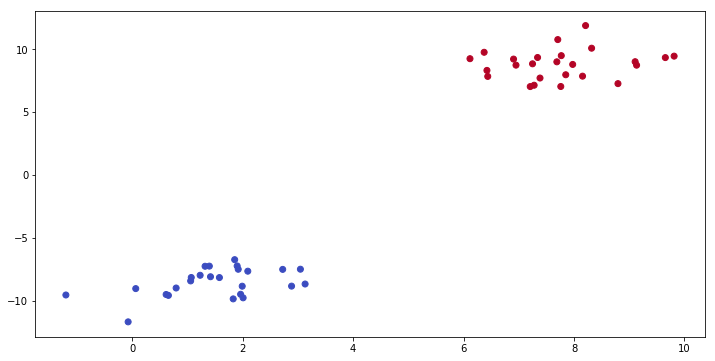

In [41]:
plt.figure(figsize = (12,6))
plt.scatter(features[:,0], features[:,1], c = labels, cmap = 'coolwarm') # rows vs first column(features), rows vs second column (labels)

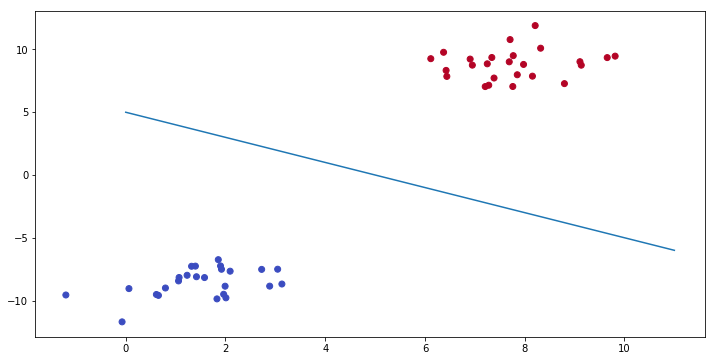

In [59]:
x = np.linspace(0,11,10)
y = -x + 5

plt.figure(figsize = (12,6))
plt.scatter(features[:,0], features[:,1], c = labels, cmap = 'coolwarm') # rows vs first column(features), rows vs second column (labels)
plt.plot(x,y) # looks like a good decision boundary

# Now we can say that anything above this line belongs to class 'Reds', and anything below the line belongs to 'Blues'

Right now we are just formulating this as a straight line, _y = mx +c_

__Remember!__ 'y' and 'x' are just the features we chose above. For instance, if I were to right the other form of above equation, I would just say _feature2 = -1*feature1 + 5_, and we can further transform it to a Matrix representation just like the following:

=> _feature2 + feature1 - 5 = 0_
=> _FeatMatrix[1,1] - 5 = 0_

Now let's go ahead and convert this _y = mx + c_ thing into a Matrix representation.

Finally, we'll create a example session graph that'll run code example!

In [71]:
np.array([1,1]).dot(np.array([[8],[10]])) - 5

# reports back the positive values -> belongs to 'Reds'

array([13])

In [72]:
np.array([2,3]).dot(np.array([[2],[3]])) - 3

array([10])

In [73]:
np.array([1,1]).dot(np.array([[2],[-10]])) - 5

# reports back the negative values -> belongs to 'Blues'

array([-13])

In [81]:
# Example session graph!

g = Graph()
g.set_as_default()

x = Placeholder()
w = Variable([1,1])
b = Variable(-5)

z = add(matmul(w,x), b)

In [82]:
a = Sigmoid(z)

In [83]:
sess = Session()

In [84]:
sess.run(operation = a, feed_dict = {x:[8,10]})

0.999997739675702

In [86]:
sess.run(operation = a, feed_dict = {x: [2,-10]})

# This is essetially zero, so it's very sure that it belongs to class '0'

2.2603242979035746e-06

### Great Job!